In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix, classification_report
import subprocess
import joblib
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('creditcard.csv')
df.shape


(13954, 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [7]:
x = df.iloc[: ,1:30].values
y = df.iloc[:,30].values

In [8]:
print("Input Range: ",x.shape)
print("Output Range: ",y.shape)

Input Range:  (13954, 29)
Output Range:  (13954,)


In [9]:
print("Class Labels: \n",y)

Class Labels: 
 [ 0.  0.  0. ...  0.  0. nan]


In [10]:
df.isnull().values.any()

True

<Axes: xlabel='Class'>

Text(0.5, 1.0, 'Class Distribution of Transaction')

([<matplotlib.axis.XTick at 0x7b77a464a800>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

Text(0.5, 0, 'Classes')

Text(0, 0.5, 'No of Occurences')

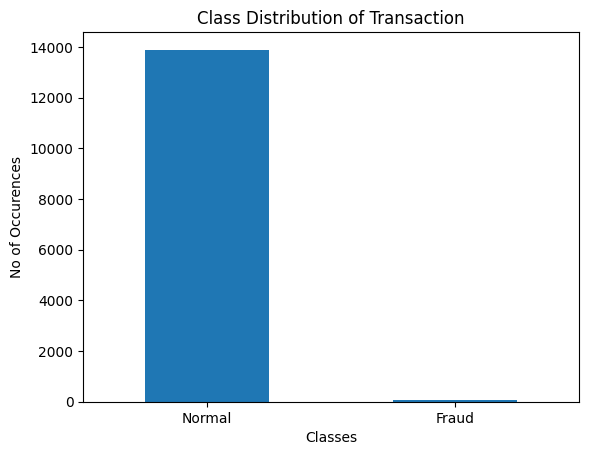

In [11]:
import matplotlib.pyplot as plt
LABELS = ["Normal","Fraud"]
set_class = pd.value_counts(df['Class'],sort = True)
set_class.plot(kind = 'bar', rot=0)
plt.title("Class Distribution of Transaction")
plt.xticks(range(2),LABELS)
plt.xlabel("Classes")
plt.ylabel("No of Occurences")

In [12]:
fraud_data = df[df['Class']==1]
normal_data = df[df['Class']==0]

In [13]:
print(fraud_data.shape,normal_data.shape)

(56, 31) (13897, 31)


In [14]:
fraud_data.Amount.describe()

count      56.000000
mean       90.815893
std       310.308450
min         0.000000
25%         1.000000
50%         1.000000
75%         1.025000
max      1809.680000
Name: Amount, dtype: float64

In [15]:
normal_data.Amount.describe()

count    13897.000000
mean        63.773909
std        177.164503
min          0.000000
25%          5.770000
50%         15.900000
75%         52.370000
max       7712.430000
Name: Amount, dtype: float64

<Figure size 2000x2000 with 0 Axes>

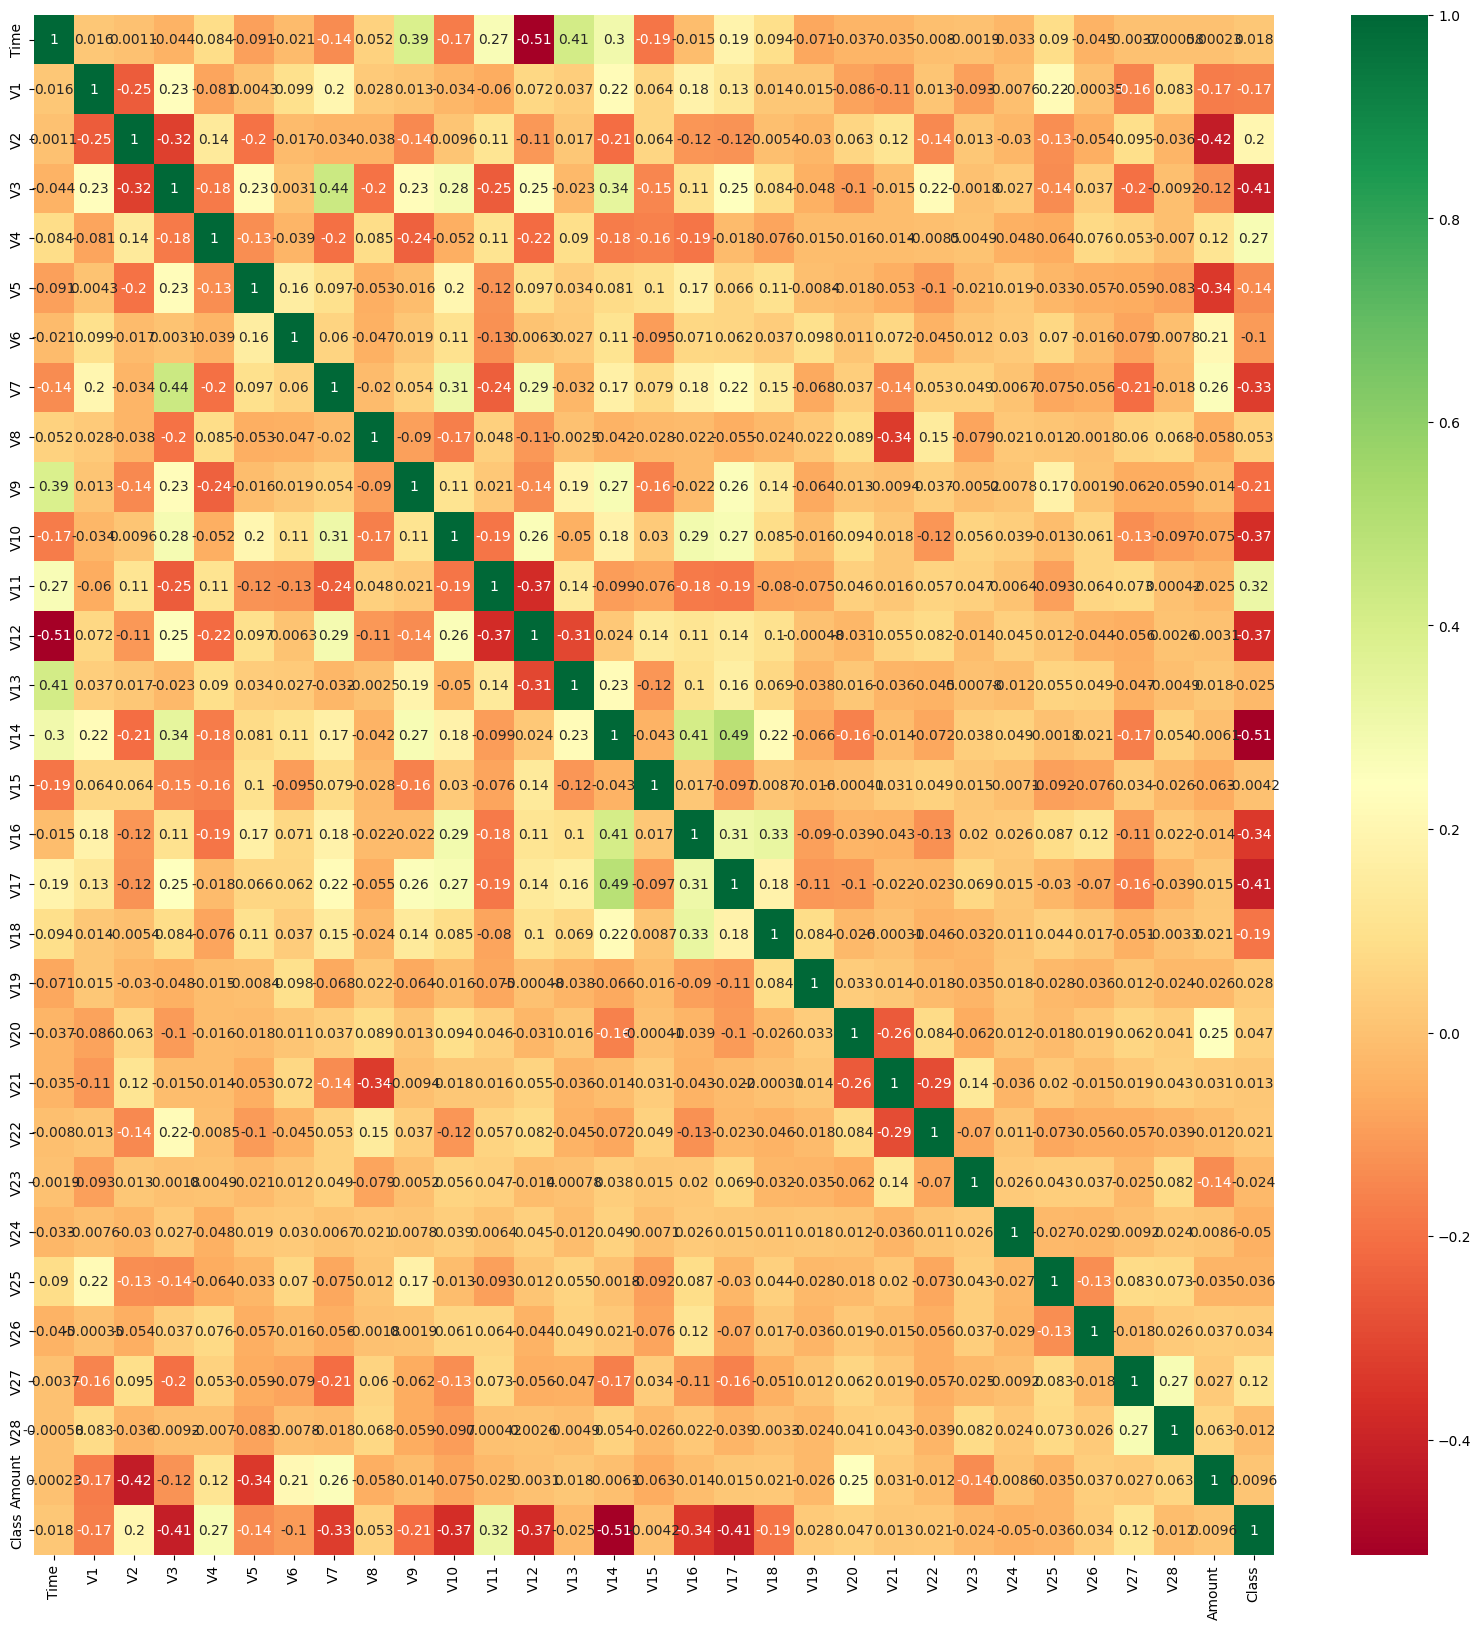

In [16]:
##Correlation
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.25, random_state=0)


In [20]:
print("xtrain.shape: ", xtrain.shape)
print("xtest.shape: ",xtest.shape)
print("ytrain.shape: ",ytrain.shape)
print("ytest.shape: ",ytest.shape)

xtrain.shape:  (10465, 29)
xtest.shape:  (3489, 29)
ytrain.shape:  (10465,)
ytest.shape:  (3489,)


In [21]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
xtrain = stdsc.fit_transform(xtrain)
xtest = stdsc.transform(xtest)

In [22]:
print("Trainig Set after Standardised: \n", xtrain[0])


Trainig Set after Standardised: 
 [-0.59363425 -0.32919544  0.39504867 -1.27354306 -0.34175723 -0.03103068
 -0.49509032  0.52324346 -0.44667082 -0.16985007 -1.07100708 -1.50409681
  0.14880763  0.34075171  0.31737306  1.78826116  0.25592681 -0.57641205
 -0.63356125  0.40956785  0.47407075  1.61311956 -0.24034886 -1.43314265
  0.10490396 -0.30776659  0.44046678  0.09759952  0.04282261]


In [23]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state =0)
dt_classifier.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize the HistGradientBoostingClassifier
hgb_classifier = HistGradientBoostingClassifier(random_state=0)

# Train the classifier on the training data
hgb_classifier.fit(xtrain, ytrain)

# Predict the test data
y_pred_hgb = hgb_classifier.predict(xtest)


HistGradientBoostingClassifier(random_state=0)

In [30]:
print("y_pred_decision_tree : \n", y_pred_hgb)

y_pred_decision_tree : 
 [0. 0. 0. ... 0. 0. 0.]


DecisionTreeClassifier(criterion='entropy', random_state=0)

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

Text(0, 0, '3474')

Text(1, 0, '2')

Text(0, 1, '2')

Text(1, 1, '10')

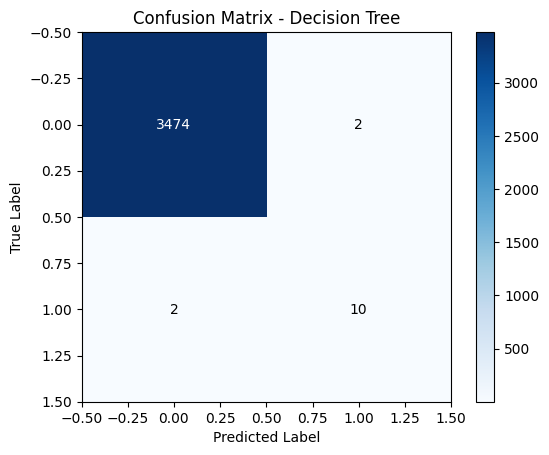

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Convert xtest and ytest to numpy arrays
xtest = np.array(xtest)
ytest = np.array(ytest)

# Ensure there are no NaN values in xtest by using SimpleImputer
imputer = SimpleImputer(strategy='mean')
xtest = imputer.fit_transform(xtest)

# Initialize and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(xtrain, ytrain)

# Identify the indices of ytest that are not NaN
not_nan_indices = ~np.isnan(ytest)

# Filter xtest and ytest using the same indices
xtest_filtered = xtest[not_nan_indices]
ytest_filtered = ytest[not_nan_indices]

# Predict the test data with the filtered xtest
y_pred_decision_tree = dt_classifier.predict(xtest_filtered)

# Compute the confusion matrix with the filtered ytest
com_decision = confusion_matrix(ytest_filtered, y_pred_decision_tree)

# Visualize the confusion matrix
plt.imshow(com_decision, cmap='Blues', interpolation='nearest')
plt.colorbar()

plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add annotations to the confusion matrix
thresh = com_decision.max() / 2
for i in range(com_decision.shape[0]):
    for j in range(com_decision.shape[1]):
        plt.text(j, i, format(com_decision[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if com_decision[i, j] > thresh else "black")

plt.show()


In [32]:
Accuracy_Model = ((com_decision[0][0] + com_decision[1][1])/ com_decision.sum())*100
print("Accuracy_Decision: ",Accuracy_Model)

Error_rate_Model = ((com_decision[0][1] + com_decision[1][0])/ com_decision.sum())*100
print("Error_rate_Decision: ",Error_rate_Model)

Specificity_Model = (com_decision[1][1] /(com_decision[1][1] + com_decision[0][1]))*100
print("Specificity_Decision: ",Specificity_Model)

Sensitivity_Model = (com_decision[0][0] / (com_decision[0][0] + com_decision[1][0]))*100
print("Sensitivity_Decision: ",Sensitivity_Model)

Accuracy_Decision:  99.88532110091744
Error_rate_Decision:  0.11467889908256881
Specificity_Decision:  83.33333333333334
Sensitivity_Decision:  99.94246260069045


RandomForestClassifier(random_state=0)

Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

Text(0.5, 0, 'Predicted Label')

Text(0, 0.5, 'True Label')

Text(0, 0, '3476')

Text(1, 0, '0')

Text(0, 1, '1')

Text(1, 1, '11')

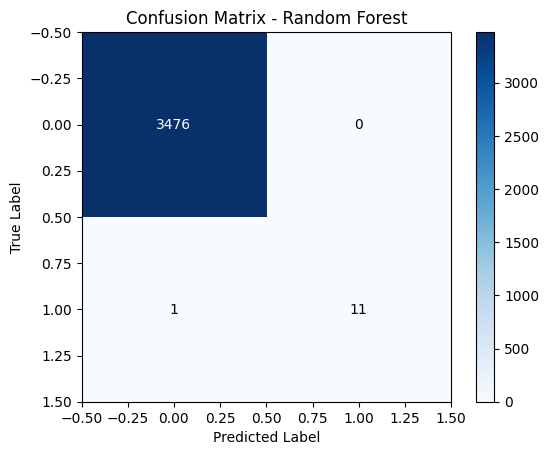

Confusion Matrix: 

 [[3476    0]
 [   1   11]]


<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Validation Metrics')

Text(0.5, 0, 'Metrics')

Text(0, 0.5, 'Percentage')

(0.0, 100.0)

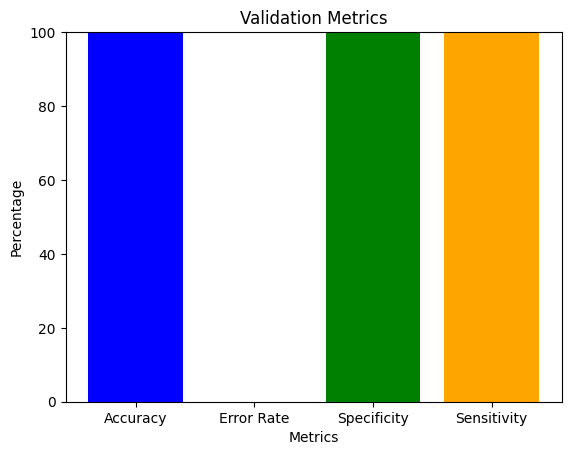

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Convert xtest and ytest to numpy arrays
xtest = np.array(xtest)
ytest = np.array(ytest)

# Ensure there are no NaN values in xtest by using SimpleImputer
imputer = SimpleImputer(strategy='mean')
xtest = imputer.fit_transform(xtest)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(xtrain, ytrain)

# Identify the indices of ytest that are not NaN
not_nan_indices = ~np.isnan(ytest)

# Filter xtest and ytest using the same indices
xtest_filtered = xtest[not_nan_indices]
ytest_filtered = ytest[not_nan_indices]

# Predict the test data with the filtered xtest
y_pred_rf = rf_classifier.predict(xtest_filtered)

# Compute the confusion matrix with the filtered ytest
cm_rf = confusion_matrix(ytest_filtered, y_pred_rf)

# Visualize the confusion matrix
plt.imshow(cm_rf, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add annotations to the confusion matrix
thresh = cm_rf.max() / 2
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(j, i, format(cm_rf[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm_rf[i, j] > thresh else "black")

plt.show()

print("Confusion Matrix: \n\n", cm_rf)

# Validating the Prediction
accuracy_rf = ((cm_rf[0][0] + cm_rf[1][1]) / cm_rf.sum()) * 100
error_rate_rf = ((cm_rf[0][1] + cm_rf[1][0]) / cm_rf.sum()) * 100
specificity_rf = (cm_rf[1][1] / (cm_rf[1][1] + cm_rf[0][1])) * 100
sensitivity_rf = (cm_rf[0][0] / (cm_rf[0][0] + cm_rf[1][0])) * 100

# Visualization using a bar plot
labels = ['Accuracy', 'Error Rate', 'Specificity', 'Sensitivity']
values = [accuracy_rf, error_rate_rf, specificity_rf, sensitivity_rf]

plt.bar(labels, values, color=['blue', 'red', 'green', 'orange'])
plt.title('Validation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limit to 0-100
plt.show()


RandomForestClassifier(random_state=0)

<Figure size 800x600 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve - Random Forest Classifier')

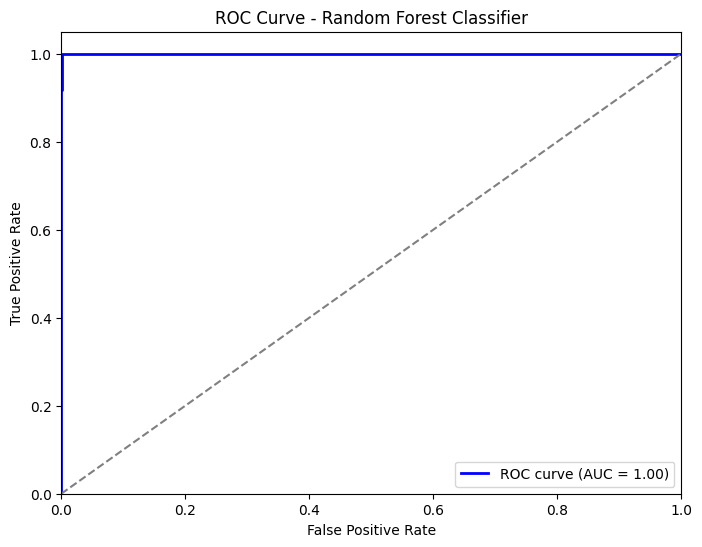

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Convert xtest and ytest to numpy arrays
xtest = np.array(xtest)
ytest = np.array(ytest)

# Ensure there are no NaN values in xtest by using SimpleImputer
imputer = SimpleImputer(strategy='mean')
xtest = imputer.fit_transform(xtest)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(xtrain, ytrain)

# Identify the indices of ytest that are not NaN
not_nan_indices = ~np.isnan(ytest)

# Filter xtest and ytest using the same indices
xtest_filtered = xtest[not_nan_indices]
ytest_filtered = ytest[not_nan_indices]

# Predict the test data with the filtered xtest
y_pred_rf = rf_classifier.predict(xtest_filtered)

# Compute predicted probabilities for positive class with filtered xtest
y_prob_rf_filtered = rf_classifier.predict_proba(xtest_filtered)[:, 1]

# Compute ROC curve and AUC score with filtered ytest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(ytest_filtered, y_prob_rf_filtered)
roc_auc_rf = roc_auc_score(ytest_filtered, y_prob_rf_filtered)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()
